In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
number_of_particles = 40
E_0 = 10 #initial energy of the system
delta = 0.5 #boarder for velocity varitation
E_d = 0.5 #Demon's energy
initial_velocity = np.sqrt(2 * E_0 / number_of_particles)

molecules = np.ones(number_of_particles) * initial_velocity

In [3]:
#Generators of random uniform value and random int
def next_random_uniform_value(delta = delta):
    while 1:
        yield np.random.uniform(-1 * delta, delta)

def next_random_int(number_of_particles = number_of_particles):
    while 1:
        yield np.random.randint(number_of_particles)
        
        
ruv = next_random_uniform_value()
ri = next_random_int()
#next(ruv), next(ri)

In [4]:
#Checks if the new configurations should be accepted
def algorithm_condition(velocity_change, velocity, E_d, E_0):
    new_velocity = velocity - velocity_change
    delta_E = (new_velocity ** 2 - velocity ** 2) / 2
    if(delta_E <= 0):
        return E_0 + delta_E, new_velocity, E_d - delta_E
    elif(delta_E > 0 and E_d > delta_E):
        return E_0 + delta_E, new_velocity, E_d - delta_E
    else:
        return E_0, velocity, E_d

In [5]:
N = 100000 #number of iterations
E = np.zeros(N + 1)
E[0] = E_0


for i in range(N):
    random_int = next(ri)
    velocity_change = next(ruv)
    E[i+1], molecules[random_int], E_d = algorithm_condition(velocity_change=velocity_change, velocity=molecules[random_int], E_d=E_d, E_0=E_0)
    

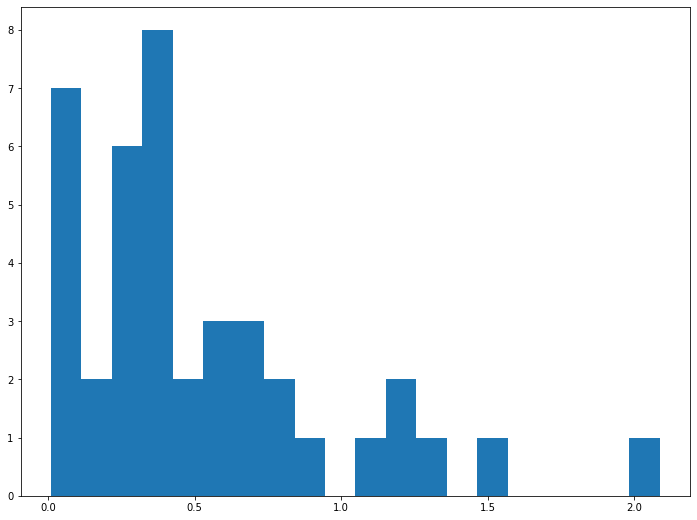

In [6]:
figure = plt.figure(figsize = (12, 9))

plt.hist(np.abs(molecules), bins=20)
plt.show()

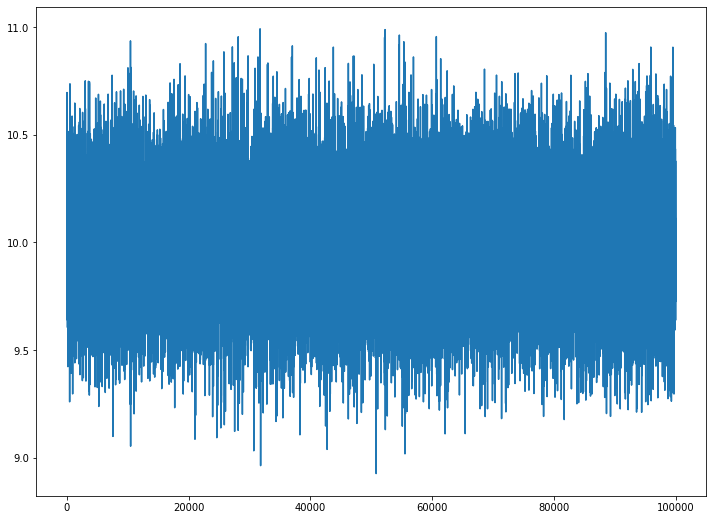

In [7]:
figure = plt.figure(figsize = (12, 9))

plt.plot(E)
plt.show()